###  Name : Aditya Vishwakarma
### Github Link : 

## The Sparks Foundation ->  GRIP: Data Science & Business Analytics Intern
 
## Task 2 : Clusters Visualization

### Clustering is the process of dividing the entire data into groups (also known as clusters) based on the patterns in the data.

### In clustering, we do not have a target to predict. We look at the data and then try to club similar observations and form different groups. Hence it is an unsupervised learning problem.


## Goal: Predict the optimum number of clusters and represent it visually.

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#read data

dataset = pd.read_csv("E:\The Sparks Foundation\Iris.csv")

In [9]:
#how many rows and columns does data consists
dataset.shape

(150, 6)

In [16]:
#checking the columns dtype and null value
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [15]:
# head()- shows first 5 rows of data
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
#check any null value
dataset.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [17]:
# Get the statistical info
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [19]:
# Taking first 4 rows i.e [rows,columns] => [start:stop,start:stop]
# iloc in pandas is used to select rows and columns by number, in the order that they appear in the data frame.
X=dataset.iloc[:,:4]
X

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm
0,1,5.1,3.5,1.4
1,2,4.9,3.0,1.4
2,3,4.7,3.2,1.3
3,4,4.6,3.1,1.5
4,5,5.0,3.6,1.4
...,...,...,...,...
145,146,6.7,3.0,5.2
146,147,6.3,2.5,5.0
147,148,6.5,3.0,5.2
148,149,6.2,3.4,5.4


In [26]:
from sklearn.cluster import KMeans

# An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). 
# WCSS is the sum of squares of the distances of each data point in all clusters to their respective centroids.

# Inertia is the sum of squared error for each cluster. Therefore the smaller the inertia the denser the cluster

# k-means++ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.


print("Finding the K ")
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    print(" K:{}".format((i))+":"+ str(kmeans.inertia_))
    

Finding the K 
 K:1:281831.54466666654
 K:2:70581.3808
 K:3:31320.711199999994
 K:4:17773.729923769926
 K:5:11423.207833147933
 K:6:7956.432515384614
 K:7:5889.12035930736
 K:8:4572.601048503611
 K:9:3602.9967051820727


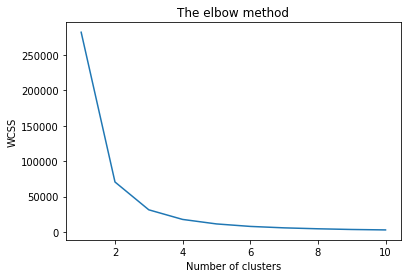

In [25]:
plt.plot(range(1, 1), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

We can see that after 3 the drop in WCSS is minimal. So we choose 3 as the optimal number of clusters.

In [36]:
# Applying kmeans to the dataset / Creating the kmeans classifier

# n_init (int, default: 10) – Number of time the k-means algorithm will be run with different centroid seeds. 
# The final results will be the best output of n_init consecutive runs in terms of inertia.

#max_iter (int, default: 300) – Maximum number of iterations of the k-means algorithm for a single run.

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

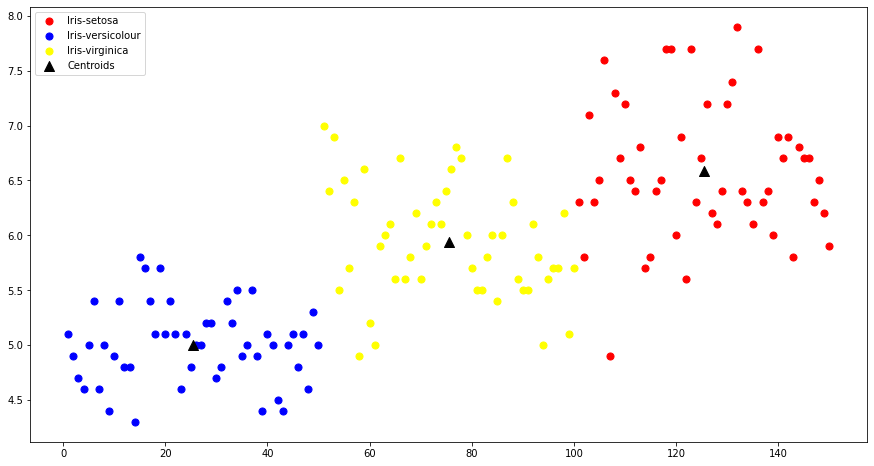

In [41]:
# Visualising the clusters and Centroids

# s means marker size 
# visualizing in 2d

plt.figure(figsize = (15,8))
X = np.array(X)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s = 50, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', marker = "^", label = 'Centroids')

plt.legend()
plt.show()